<a href="https://colab.research.google.com/github/aKhalid8970/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project I will
- Fetch and explore a dataset of cars
- Visualize my dataset with graphs
- Use linear regression to make predictions
- Use multiple linear regression to make better predictions
- Discover the best-value cars!

In [1]:
# Run this to import libraries and data
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import os # Good for navigating computer's files

# dataset is hosted on Google Cloud.
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202a%20-%20Linear%20Regression/car_dekho.csv"

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

car_dekho.csv       100%[===================>]  13.75K  --.-KB/s    in 0s      


In [2]:
# read our data in using 'pd.read_csv('file')'
data_path  = 'car_dekho.csv'
car_data = pd.read_csv(data_path)

In [3]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,4495,27000,Petrol,Dealer,Manual
1,sx4,6,6373,43000,Diesel,Dealer,Manual
2,ciaz,2,9727,6900,Petrol,Dealer,Manual
3,wagon r,8,3824,5200,Petrol,Dealer,Manual
4,swift,5,6172,42450,Diesel,Dealer,Manual


In [4]:
print(len(car_data))

301


<Axes: xlabel='Age', ylabel='Selling_Price'>

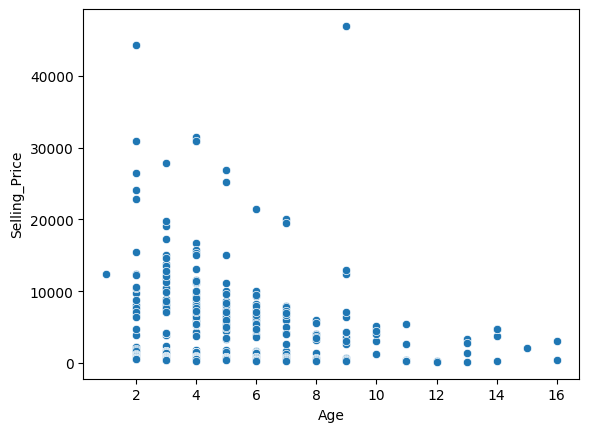

In [5]:
# handy visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Each dot is a single example (row) from the dataframe, with its
# x-value as `Age` and its y-value as `Selling_Price`
sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

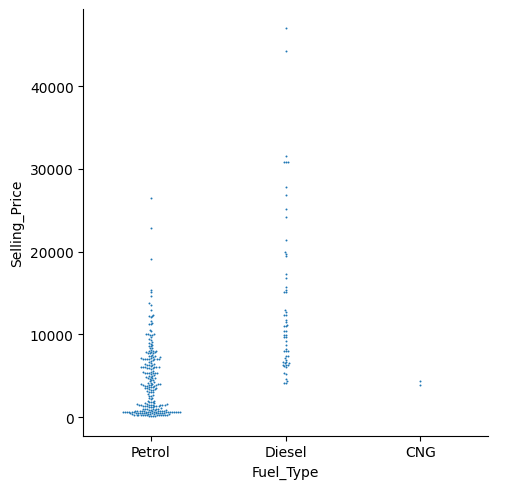

In [6]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)

In [7]:
car_data.groupby('Fuel_Type').size()

,0
Fuel_Type,
CNG,2
Diesel,60
Petrol,239


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

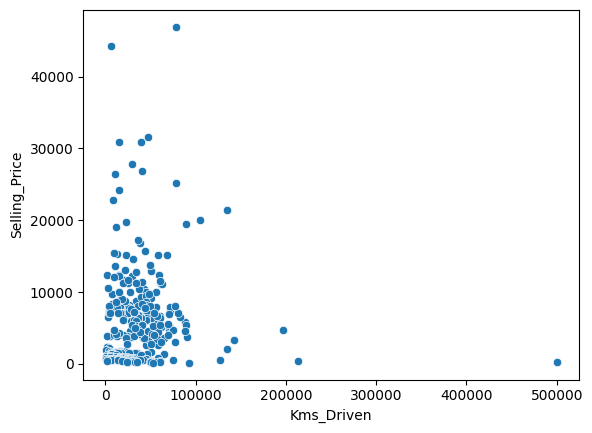

In [8]:
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=car_data)

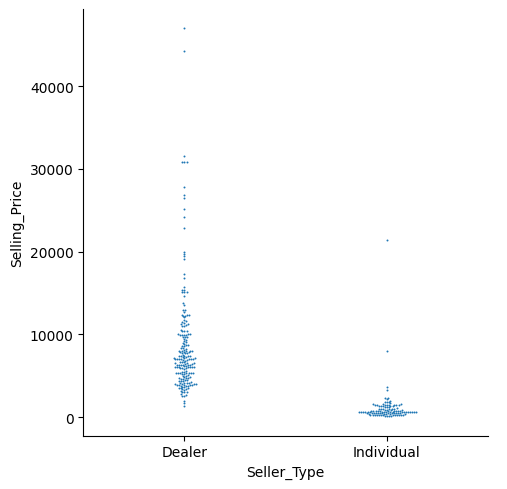

In [9]:
sns.catplot(x='Seller_Type', y='Selling_Price', data=car_data, kind='swarm', s=2)

In [10]:
import sklearn
# fitter from 'prediction' toolbox: sklearn!
from sklearn.linear_model import LinearRegression
import numpy as np    # Great for lists (arrays) of numbers

# Initializing our X and y variables.
X = car_data[['Age']]
y = car_data[['Selling_Price']]

In [11]:
# set up our model
linear = LinearRegression()

# train the model
linear.fit(X, y)

LinearRegression()

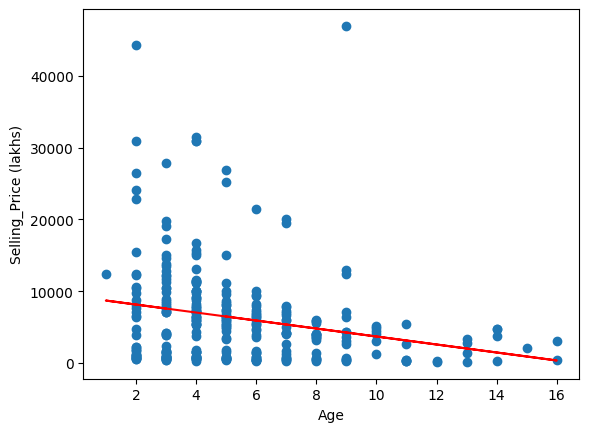

In [12]:
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (lakhs)')
plt.show()

In [13]:
# find slope
print('Our m in lakhs/year: ', linear.coef_)

Our m in lakhs/year:  [[-556.92786812]]


In [14]:
# find y int
print('Our intercept b: ', linear.intercept_)

Our intercept b:  [9245.96133806]


In [15]:
# replace method takes a dictionary as its arg, with the keys being the values already in transmission, and the values being the numbers we want to assign those keys to
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})

In [16]:
car_data.head(20)

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber
0,ritz,5,4495,27000,Petrol,Dealer,Manual,1
1,sx4,6,6373,43000,Diesel,Dealer,Manual,1
2,ciaz,2,9727,6900,Petrol,Dealer,Manual,1
3,wagon r,8,3824,5200,Petrol,Dealer,Manual,1
4,swift,5,6172,42450,Diesel,Dealer,Manual,1
5,vitara brezza,1,12411,2071,Diesel,Dealer,Manual,1
6,ciaz,4,9057,18796,Petrol,Dealer,Manual,1
7,s cross,4,8721,33429,Diesel,Dealer,Manual,1
8,ciaz,3,11740,20273,Diesel,Dealer,Manual,1
9,ciaz,4,9996,42367,Diesel,Dealer,Manual,1


In [23]:
#Initializing X, y variables

X_column = 'TransmissionNumber' # Feel free to try different inputs!
X = car_data[[X_column]]
y = car_data[['Selling_Price']]

#Setting up model
linear = LinearRegression()

#Training
linear.fit(X,y)

LinearRegression()

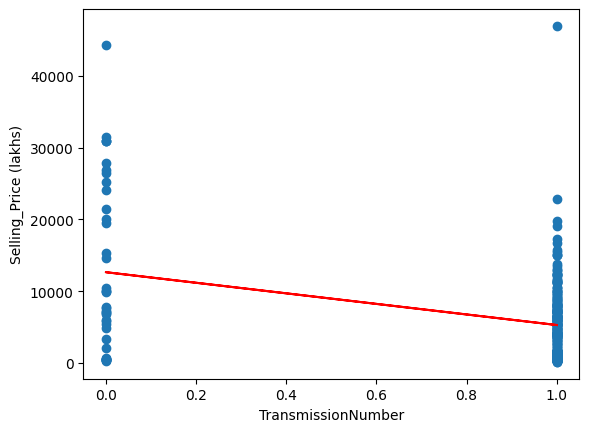

In [24]:
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel(X_column) # Automated setup of axis labels
plt.ylabel('Selling_Price (lakhs)')
plt.show()

In [25]:
X = car_data[['Age', 'TransmissionNumber', 'Kms_Driven']]

# set up our model
multiple = LinearRegression(fit_intercept = True)

# train the model
multiple.fit(X, y)

LinearRegression()

In [26]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(car_data[[X_column]], y))

Our single linear model had an R^2 of: 0.135


In [27]:
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(X, y))

Our multiple linear model had an R^2 of: 0.203


In [28]:
car_data['SellerTypeNumber'] = car_data['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
X = car_data[['SellerTypeNumber', 'Kms_Driven', 'TransmissionNumber', 'Age']]
y = car_data[['Selling_Price']]
new_multiple = LinearRegression(fit_intercept=True)
new_multiple.fit(X, y)
print('The new multiple linear model had an R^2 of: %0.3f'%new_multiple.score(X, y))

The new multiple linear model had an R^2 of: 0.462


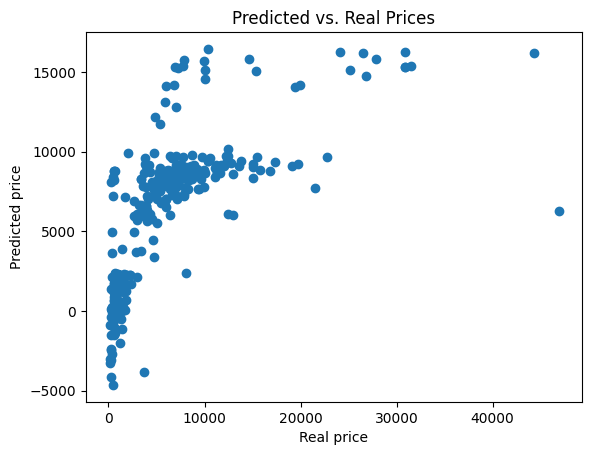

In [29]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality for comparison
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
prediction = new_multiple.predict(X)
plt.scatter(y, prediction)
plt.show()

In [30]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

car_data['Prediction'] = prediction
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerTypeNumber   Prediction
0       ritz    5           4495       27000    Petrol      Dealer       Manual                   1                 0  8094.322646
1        sx4    6           6373       43000    Diesel      Dealer       Manual                   1                 0  7665.662935
2       ciaz    2           9727        6900    Petrol      Dealer       Manual                   1                 0  9630.015783
3    wagon r    8           3824        5200    Petrol      Dealer       Manual                   1                 0  6183.610992
4      swift    5           6172       42450    Diesel      Dealer       Manual                   1                 0  8232.605131
..       ...  ...            ...         ...       ...         ...          ...                 ...               ...          ...
296     city    3          12746       33988    Diesel      Dealer       Manual    

In [31]:
car_data['deal_score'] = car_data['Prediction'] / car_data['Selling_Price'] #FILL IN HERE
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerTypeNumber   Prediction  deal_score
0       ritz    5           4495       27000    Petrol      Dealer       Manual                   1                 0  8094.322646    1.800739
1        sx4    6           6373       43000    Diesel      Dealer       Manual                   1                 0  7665.662935    1.202834
2       ciaz    2           9727        6900    Petrol      Dealer       Manual                   1                 0  9630.015783    0.990029
3    wagon r    8           3824        5200    Petrol      Dealer       Manual                   1                 0  6183.610992    1.617053
4      swift    5           6172       42450    Diesel      Dealer       Manual                   1                 0  8232.605131    1.333863
..       ...  ...            ...         ...       ...         ...          ...                 ...               ...          ...         ...

In [32]:
best_deals = car_data.sort_values('deal_score', ascending=False).head(10)
most_overpriced = car_data.sort_values('deal_score', ascending=True).head(10)
print (best_deals)
print (most_overpriced)

              Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerTypeNumber   Prediction  deal_score
196          Activa 3g   11            228      500000    Petrol  Individual    Automatic                   0                 1  8097.924429   35.517212
177   Honda Activa 125    3            470       24000    Petrol  Individual    Automatic                   0                 1  8412.489845   17.898915
173          Activa 4g    2            537        1300    Petrol  Individual    Automatic                   0                 1  8781.182395   16.352295
178        TVS Jupyter    5            470       19000    Petrol  Individual    Automatic                   0                 1  7224.008484   15.370231
186           TVS Wego    9            335       22000    Petrol  Individual    Automatic                   0                 1  4963.399957   14.816119
159    Honda Activa 4G    2            604        4000    Petrol  Individual    Au